## Домашнее задание 3 (10 баллов)

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [1]:
import pandas as pd

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [2]:
# your code here
data = pd.read_csv("https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv")
data.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good


In [3]:
data.tail()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
999,no checking account,30,no credits taken/all credits paid back duly,car (used),6350,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,car or other,31,none,rent,1,skilled employee/official,0 to 2,no,no,bad


In [4]:
data.shape

(1000, 21)

### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [5]:
data.isna().any() # проверка на пропуски NaN

status                     False
duration                   False
credit_history             False
purpose                    False
amount                     False
savings                    False
employment_duration        False
installment_rate           False
personal_status_sex        False
other_debtors              False
present_residence          False
property                   False
age                        False
other_installment_plans    False
housing                    False
number_credits             False
job                        False
people_liable              False
telephone                  False
foreign_worker             False
credit_risk                False
dtype: bool

In [6]:
data.isnull().values.any() #проверка на пропуски null

False

Количественные признаки: duration, amount, age,

Бинарные признаки: telephone, foreign_worker, credit_risk

Порядковые признаки: status, savings, employment_duration, installment_rate, present_residence, number_credits, people_liable

Категориальные признаки: credit_history, purpose, personal_status_sex, other_debtors, property, other_installment_plans, housing, job 

In [7]:
data['people_liable'].value_counts()

0 to 2       845
3 or more    155
Name: people_liable, dtype: int64

### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [8]:
data.groupby('purpose')['amount'].mean()

purpose
business               8209.333333
car (new)              5370.223301
car (used)             3066.983425
domestic appliances    2728.090909
furniture/equipment    2487.685714
others                 3062.948718
radio/television       1498.000000
repairs                3180.400000
retraining             4158.041237
vacation               1205.888889
Name: amount, dtype: float64

### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [9]:
# какой процент клиентов моложе 30 лет снимает жилье
per1 = data[(data['age'] < 30) & (data['housing']=='rent')].count()[0] /data[(data['age'] < 30)].count()[0]
print("{:.2%}".format(per1))

66.67%


In [10]:
# какой процент клиентов старше 40 лет снимает жилье
per1 = data[(data['age'] > 40) & (data['housing']=='rent')].count()[0] /data[(data['age'] > 40)].count()[0]
print("{:.2%}".format(per1))

68.01%


### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [11]:
data['number_credits'].value_counts()

1       633
2-3     333
4-5      28
>= 6      6
Name: number_credits, dtype: int64

In [12]:
data[(data['foreign_worker'] == 'yes') & ((data['number_credits'] == '4-5') | (data['number_credits'] == '>= 6'))].shape[0]

1

### Задание 6 (1 балл)

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

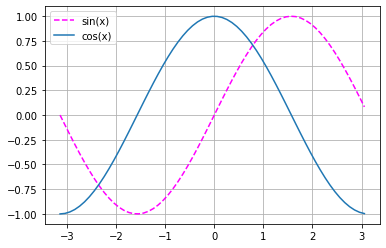

In [14]:
x = np.arange(-np.pi, np.pi, 0.1)
y = np.sin(x)
z = np.cos(x)
fig, ax = plt.subplots() 
ax.plot(x,y, linestyle = 'dashed', color = 'magenta')
ax.plot(x, z)
ax.legend(['sin(x)', 'cos(x)']) 
ax.grid()

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

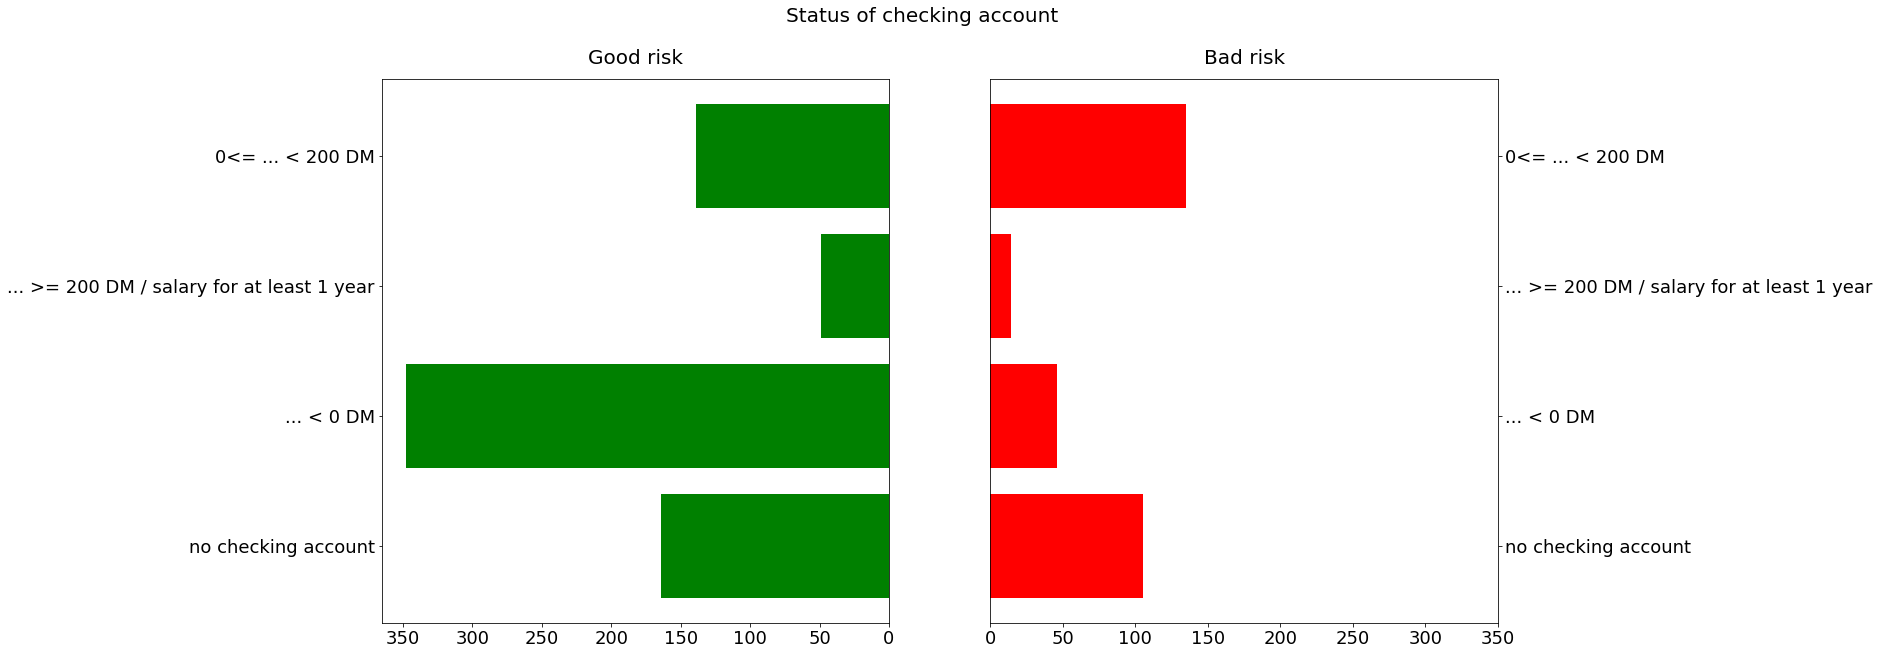

In [15]:
values1 = data[data['credit_risk'] == 'good'].groupby('status')['credit_risk'].count()
values2 = data[data['credit_risk'] == 'bad'].groupby('status')['credit_risk'].count()
ydata = data['status'].unique()
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.set_title('Good risk', fontsize=20, pad=15)
ax2.set_title('Bad risk', fontsize=20, pad=15)
f.suptitle("Status of checking account", fontsize=20)
ax1.barh(ydata, values1, color = 'green')
ax2.barh(ydata, values2, color = 'red')
ax2.yaxis.tick_right()
ax1.invert_xaxis()
ax1.tick_params(labelsize= 18)
ax2.tick_params(labelsize= 18)
w = ax1.get_xticklabels()
ax2.set_xticks([0, 50, 100, 150, 200, 250, 300, 350])

### Задание 8  (0.5 балла)

In [16]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

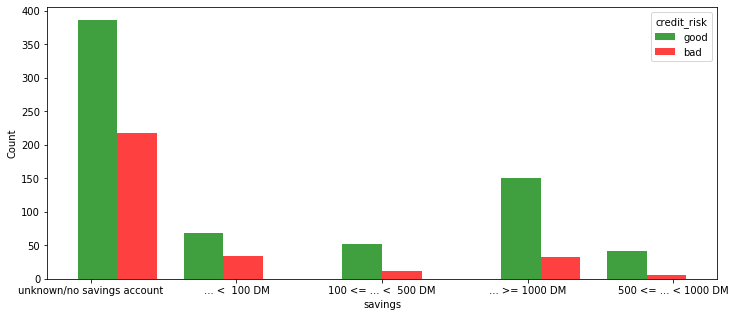

In [17]:
# оба вопроса - больше нравится через seaborn
plt.figure(figsize = (12,5))
count = data.groupby('savings')['credit_risk'].count()
sns.histplot(x='savings', hue='credit_risk', edgecolor= None, data=data, discrete = False, palette={'good': 'green', 'bad':'red'}, multiple='dodge', shrink=1.5)#, palette='autumn')

### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

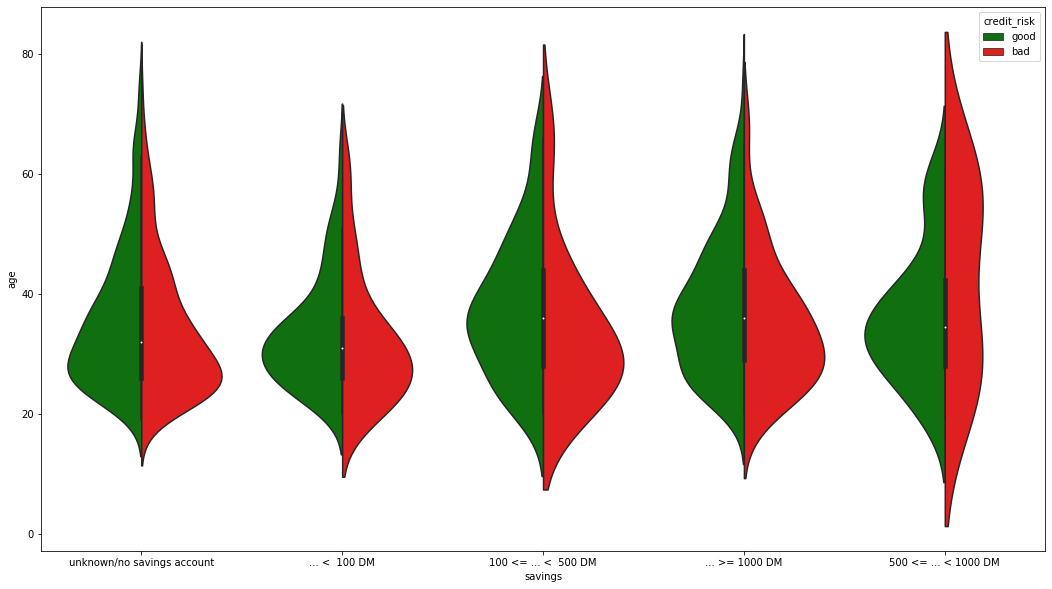

In [18]:
plt.figure(figsize = (18,10))
sns.violinplot(data=data, x="savings", y="age", hue="credit_risk",
               split=True, palette={'good': 'green', 'bad':'red'})

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

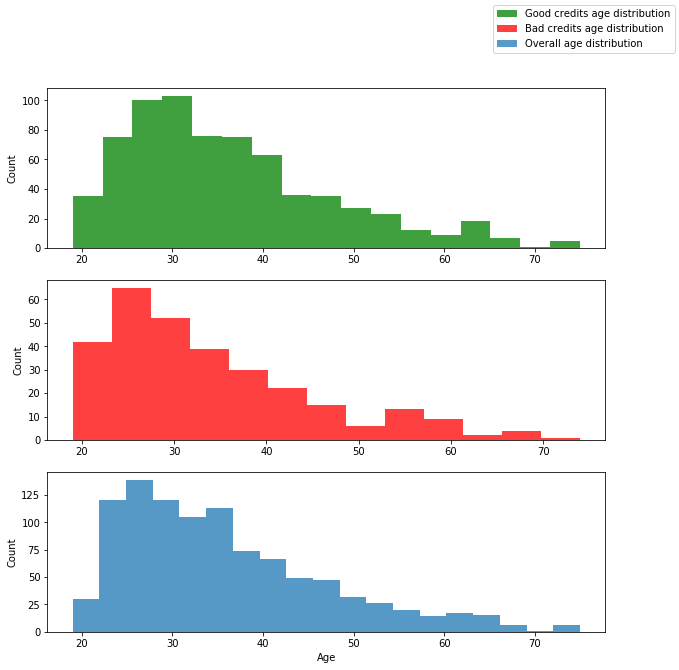

In [19]:
f, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(10,10))
data_good = data[data['credit_risk'] == 'good']
sns.histplot(ax=ax1, x='age', data=data_good, color='green', edgecolor=None)
ax1.set(xlabel=None)
data_bad = data[data['credit_risk'] == 'bad']
sns.histplot(ax=ax2, x='age', data=data_bad, color='red', edgecolor=None)
ax2.set(xlabel=None)
sns.histplot(ax=ax3, x='age', data=data, edgecolor=None)
plt.xlabel('Age')
f.legend(labels=['Good credits age distribution', 'Bad credits age distribution', 'Overall age distribution'])

### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

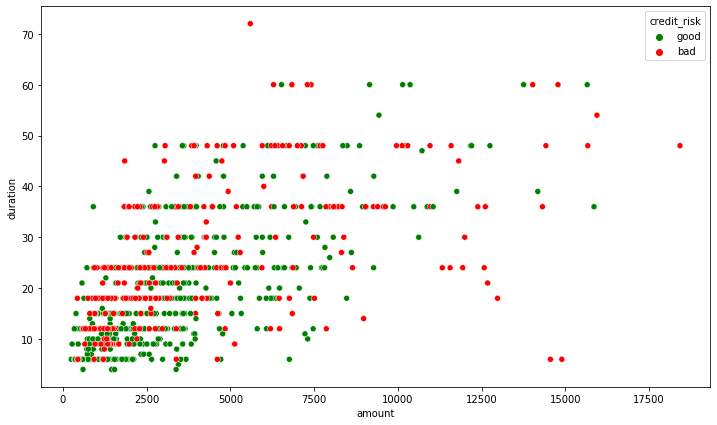

In [20]:
plt.figure(figsize = (12,7))
sns.scatterplot(data=data, x='amount', y='duration', hue='credit_risk', palette={'good': 'green', 'bad':'red'})

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

In [21]:
from mpl_toolkits import mplot3d

Text(0.5, 0, 'Age')

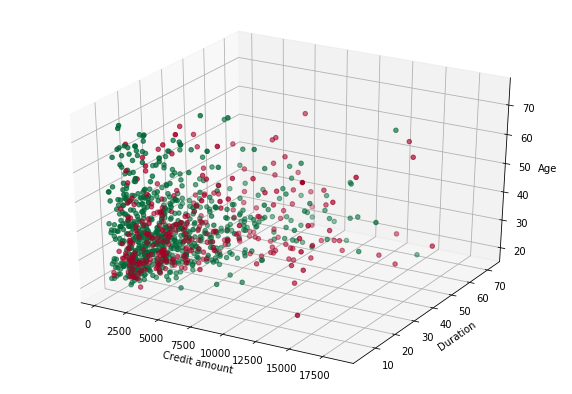

In [22]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
c = data['credit_risk'] == 'good'
ax.scatter(data['amount'], data['duration'], data['age'], c=c, cmap='RdYlGn')
ax.set_xlabel('Credit amount')
ax.set_ylabel('Duration')
ax.set_zlabel('Age')

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

In [23]:
# закодируем бинарные признаки
data['telephone'] = data['telephone'].map({'no': 0, 'yes (under customer name)': 1})
data['foreign_worker'] = data['foreign_worker'].map({'no': 0, 'yes': 1})
data['credit_risk'] = data['credit_risk'].map({'bad': 0, 'good': 1})

In [25]:
# закодируем порядковые признаки:
#    для каждого признака создаем словарь из его уникальных значений и номера этого значения
orderal = ['status', 'savings', 'employment_duration', 'installment_rate', 'present_residence', 'number_credits', 'people_liable']
for feature in orderal:
    values = data[feature].unique()
    diction_map = {}
    for value in values:
        diction_map[value] = np.where(values==value)[0][0]
    data[feature] = data[feature].map(diction_map)
data.head(10)

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,0,18,all credits at this bank paid back duly,car (used),1049,0,0,0,female : non-single or male : single,none,...,car or other,21,none,for free,0,skilled employee/official,0,0,0,1
1,0,9,all credits at this bank paid back duly,others,2799,0,1,1,male : married/widowed,none,...,unknown / no property,36,none,for free,1,skilled employee/official,1,0,0,1
2,1,12,no credits taken/all credits paid back duly,retraining,841,1,2,1,female : non-single or male : single,none,...,unknown / no property,23,none,for free,0,unskilled - resident,0,0,0,1
3,0,12,all credits at this bank paid back duly,others,2122,0,1,2,male : married/widowed,none,...,unknown / no property,39,none,for free,1,unskilled - resident,1,0,1,1
4,0,12,all credits at this bank paid back duly,others,2171,0,1,0,male : married/widowed,none,...,car or other,38,bank,rent,1,unskilled - resident,0,0,1,1
5,0,10,all credits at this bank paid back duly,others,2241,0,0,3,male : married/widowed,none,...,unknown / no property,48,none,for free,1,unskilled - resident,1,0,1,1
6,0,8,all credits at this bank paid back duly,others,3398,0,2,3,male : married/widowed,none,...,unknown / no property,39,none,rent,1,unskilled - resident,0,0,1,1
7,0,6,all credits at this bank paid back duly,others,1361,0,0,1,male : married/widowed,none,...,unknown / no property,40,none,rent,0,unskilled - resident,1,0,1,1
8,2,18,all credits at this bank paid back duly,furniture/equipment,1098,0,3,0,female : non-single or male : single,none,...,building soc. savings agr./life insurance,65,none,rent,1,unemployed/unskilled - non-resident,0,0,0,1
9,1,24,no credits taken/all credits paid back duly,furniture/equipment,3758,2,3,3,female : non-single or male : single,none,...,real estate,23,none,for free,0,unemployed/unskilled - non-resident,0,0,0,1


In [26]:
# под "избавьтесь" понимаю OHE , чтобы возможно использовать в след задании
# categorial = ['credit_history', 'purpose', 'personal_status_sex', 'other_debtors', 'property', 'other_installment_plans', 'housing']
Data = pd.get_dummies(data)
Data.shape

(1000, 49)

### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

In [47]:
def predict(Xtest: np.array) -> np.array:
    res = []
    for x in Xtest:
        status = x[0]
        savings = x[3]
        all_paid = x[12]
        furnit = x[21]
        car = x[18]
        age = x[7]
        if (status*7/8 + savings*7/8 + all_paid*5/6 + age/70) > 1:
            res.append(1)

        else:
            res.append(0)
    return np.array(res)

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = Data.drop('credit_risk', 1).values
y = Data['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)

accuracy_score(y_test, predict(X_test))


0.78